## Linear Regression

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

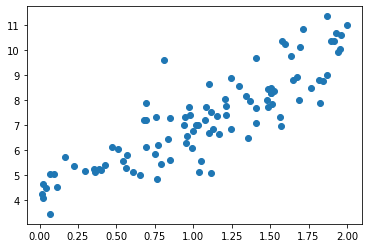

In [8]:
plt.scatter(X, y)

In [10]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.17818637],
       [2.85909684]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17818637],
       [9.89638005]])

(0.0, 2.0, 0.0, 15.0)

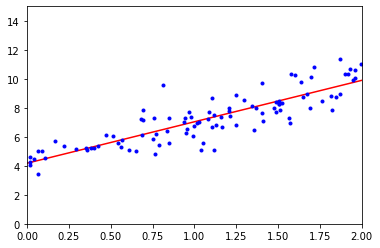

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([4.17818637]), array([[2.85909684]]))

In [23]:
lin_reg.predict(X_new)

array([[4.17818637],
       [9.89638005]])

## Gradient Descent

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
y.shape, y.ravel().shape

((100, 1), (100,))

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13836503]), array([2.84420612]))

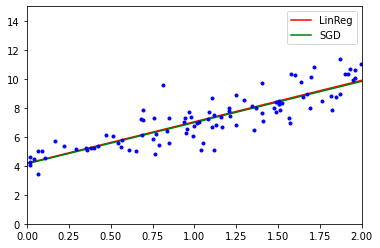

In [33]:
plt.plot(X_new, y_predict, "r-", label='LinReg')
plt.plot(X_new, sgd_reg.predict(X_new), "g-", label='SGD')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()